# **Stranger Sections Challenge**

## TL;DR

**Eager to get working?** This challenge involves unsupervised segmentation of thin section images. There are 1000 unlabeled images in the dataset your job will be to provide a model that can accurately segment the blobs on the thin sections. You are free to explore any and all methods you see fit to effectively segment these images. There are two types of thin section images, plain light and ultraviolet light images. Ultaviolet light images are used to identify brown blobs that fluoresce a yellow or green color. Each image may contain a variety of blobs to segment. We have provided three examples of satisfactory labels in the `Data` discussion below to serve as a guide. Challenger's work will be evaluated by a panel of judges for accuracy of the label masks (70%), effeciency of the code (25%), and notebook organization/interprability (5%). In addition to the best overall model, challengers will be able to win prizes for honorable mentions.

## Background

Scale is one of the more interesting aspects of science.  Biology investigates genomes and entire ecosystems.  Physics spans quantum forces to gravitational waves from the Big Bang.  Understanding all the different scales for a problem helps us better understand our natural world and how it is changing.  For this challenge, we're asking you to investigate the micrometer scale of geosciences by examining thin sections of rocks and identifying their components.

This challenge aims to build a machine-learning solution to a problem often encountered by machine learning researchers; label scarcity. Challengers will recieve 1000 unlabeled thin section images, and will need to provide a model that is able to correctly segment all blobs on each image.

The fun of this challenge is that there is no one correct way to complete this task. Challengers should focus on their strengths to build a model. If you are an expert with unsupervised clustering, maybe you use `sklearn`'s `kmeans` to create segments with clustering. Maybe you want to test out Meta's SAM model, or better yet one of the offshoots like `segmenteverygrain`. Maybe your background is image processing and you spend most of your time building a pipeline to ingest and enhance the images prior to segmentation.

Since this challenge gives you the freedom to explore different paths, we will be awarding several different prizes for different accomplishments. A total prize pool of $25,000 dollars will be awarded. See `Prizes` section for more information about prize distributions. Whatever approach you choose, all we ask that the solution involves machine learning.

## Data

As highlighted above, the dataset consists of 1000 unlabeled thin section images. Some of these images will will be plain light images and others will be UV light. There will be various blobs on on each thin section image that need to be segmented. Below are 3 examples showing how one might segment the images. The examples show the three types of blobs found on the images. As you'll see, there are potentially more segments on the image than what is currently provided. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import numpy as np
import time

%matplotlib inline

### Example 1

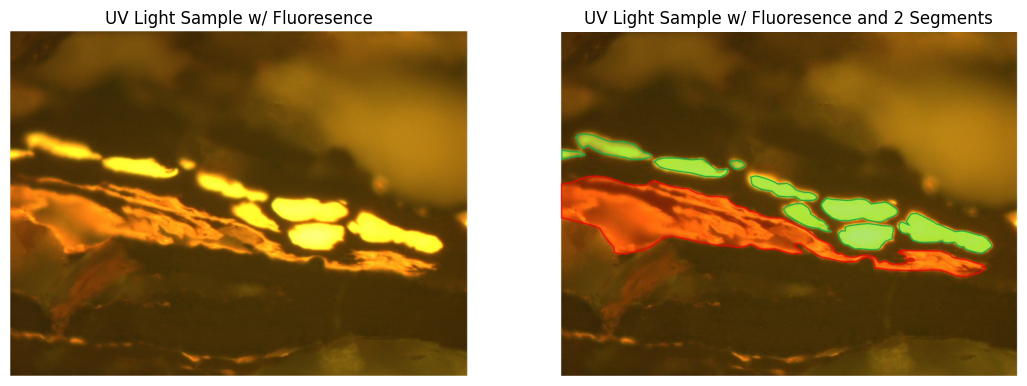

In [4]:
# figure size in inches optional
rcParams['figure.figsize'] = 13 ,10

# read images
img_A = mpimg.imread('images/image1.jpg')
img_B = mpimg.imread('images/image1_label.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].title.set_text('UV Light Sample w/ Fluoresence')
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].title.set_text('UV Light Sample w/ Fluoresence and 2 Segments')
ax[1].imshow(img_B)
ax[1].axis('off')
plt.savefig('sample1.png')
plt.show()

### Example 2

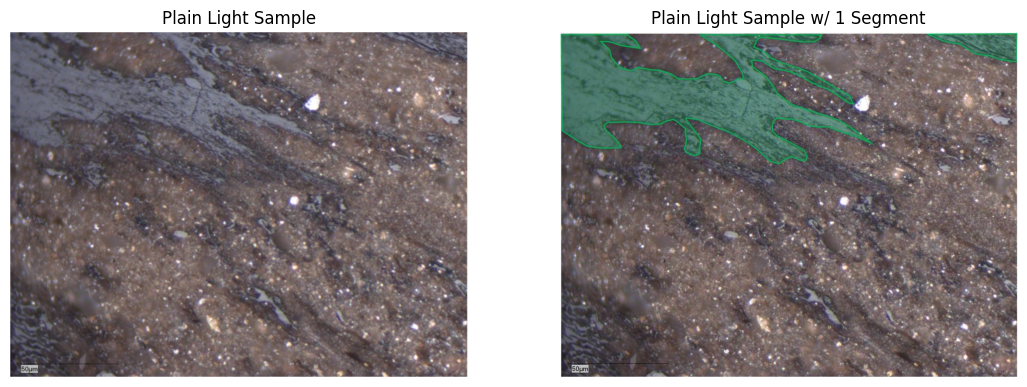

In [5]:
# figure size in inches optional
rcParams['figure.figsize'] = 13 ,10

# read images
img_A = mpimg.imread('images/image2.jpg')
img_B = mpimg.imread('images/image2_label.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].title.set_text('Plain Light Sample')
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].title.set_text('Plain Light Sample w/ 1 Segment')
ax[1].imshow(img_B)
ax[1].axis('off')
plt.savefig('sample2.png')
plt.show()

### Example 3

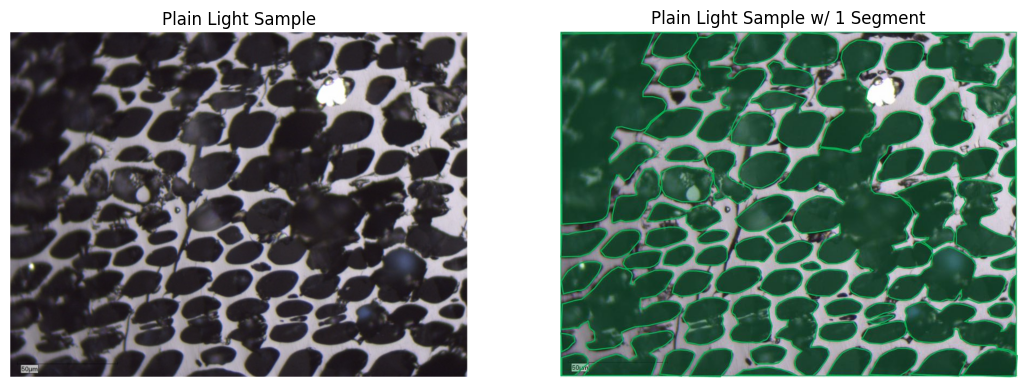

In [6]:
# figure size in inches optional
rcParams['figure.figsize'] = 13 ,10

# read images
img_A = mpimg.imread('images/image3.jpg')
img_B = mpimg.imread('images/image3_label.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].title.set_text('Plain Light Sample')
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].title.set_text('Plain Light Sample w/ 1 Segment')
ax[1].imshow(img_B)
ax[1].axis('off')
plt.savefig('sample3.png')
plt.show()

## Evaluation

Can you build a model to accurately segment all blobs in a thin section image? This is an unstructured competition where your task is to create a Notebook that best addresses the Evaluation criteria below. Submissions should be submitted on the Stranger Sections challenge page and will be judged by Xeek based on how well they address:

* **Image Segments (70%)**
    * How well are the images segmented? 
    * If there are multiple blobs are they broken out into different segments? 
    * Is the entire blob segmented? 
    * If there are metrics available, did the author provide a way of assessing the performance and accuracy of their solution? - Silhouette Score, ARI, Loss Function
* **Code efficiency (25%)**
    * What is the model runtime? *Note: If a clear winner cannot be determined visually, judges will look at code performance to determine a winner.*
* **Notebook Presentation (5%)**
    * Does the notebook contain data visualizations that help to communicate the author’s main points? 
    * Is the code documented in a way that makes it easy to understand and reproduce? 
    * Were all external sources of data made public and cited appropriately?

## Approach

To solve this problem, I utilized the [segmenteverygrain](https://github.com/zsylvester/segmenteverygrain/tree/main) model. `segmenteverygrain` is built using Meta's [Segment Anything Model (SAM)](https://github.com/facebookresearch/segment-anything).  SAM can create masks for all objects in an image, but requires the use of input prompts such as points or boxes.  `segmenteverygrain` builds on this by utilizing a Unet-style, patch-based convolutional neural network to create a first-pass segmentation, which is then used as the set of prompts for the SAM-based segmentation.

The issue is that the out-of-the-box segmenteverygrain model had poor performance with these examples.  I took 2 approaches to solve this problem:

1. Image enhancement.  Many of the images in this project had poor contrast. I enhanced the brightness and contrast of the images utilizing [adaptive histogram equalization](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_adapthist), which performs local contrast enhancement using histograms computed over different tile regions of the images. This greatly improved the ability of the ML algorithm to identify the grains in the images.

### Example 1 - UV Light Example

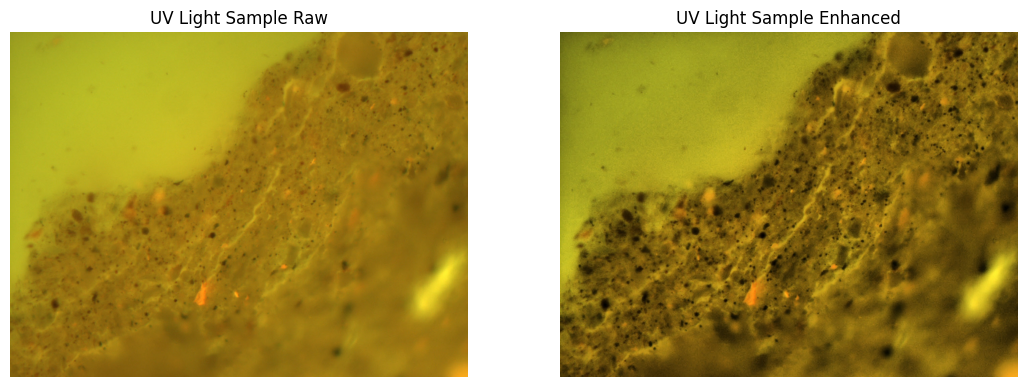

In [2]:
# figure size in inches optional
rcParams['figure.figsize'] = 13 ,10

# read images
img_A = mpimg.imread('images/example1.jpg')
img_B = mpimg.imread('images/example1_enhanced.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].title.set_text('UV Light Sample Raw')
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].title.set_text('UV Light Sample Enhanced')
ax[1].imshow(img_B)
ax[1].axis('off')
# plt.savefig('example1.png')
plt.show()

### Example 2 - Plain Light Example

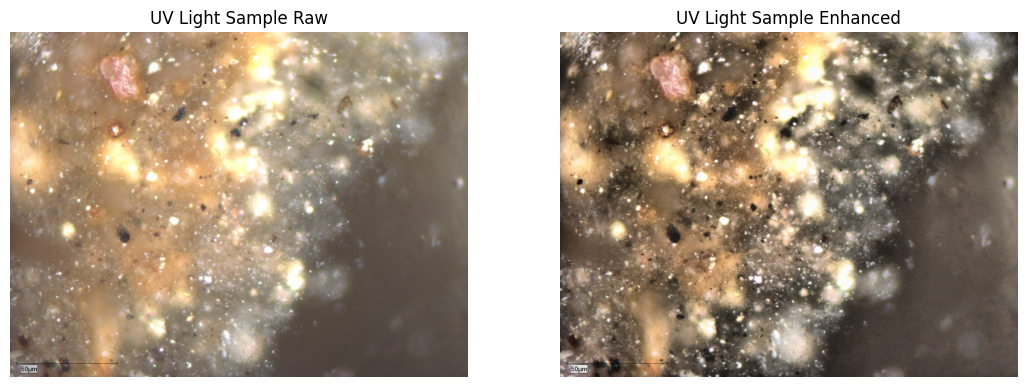

In [3]:
# figure size in inches optional
rcParams['figure.figsize'] = 13 ,10

# read images
img_A = mpimg.imread('images/example2.jpg')
img_B = mpimg.imread('images/example2_enhanced.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].title.set_text('UV Light Sample Raw')
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].title.set_text('UV Light Sample Enhanced')
ax[1].imshow(img_B)
ax[1].axis('off')
# plt.savefig('example2.png')
plt.show()

2. Model Training.  After image enhancement, the model performance on these images was still poor.  In general, it often tended to lump together large portions of the image as a single grain, segment blurry/out of focus areas as grains, and was not able to segment interior grains or more subtle grains.  In order to improve model performance, I modified the output labels for **40** images, and then trained the model on these images. For training, the images were broken into tiles (40 images, at 63 tiles per image, for a total of 2520 tiles and corresponding masks). The training tiles were broken into training, validation, and test sets (50% training, 25% validation, and 25% test). Training was performed using 200 epochs, with a final validation loss and accuracy of **0.5582** and **0.9482**, respectively.

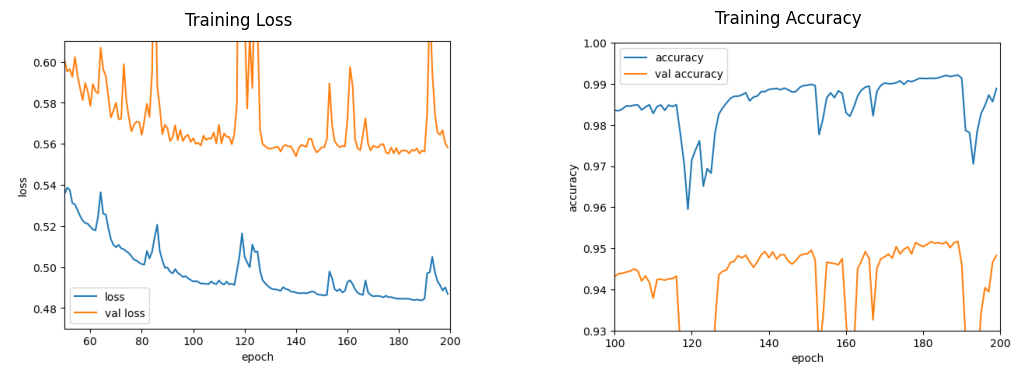

In [13]:
# figure size in inches optional
rcParams['figure.figsize'] = 13 ,10

# read images
img_A = mpimg.imread('images/loss_plot.png')
img_B = mpimg.imread('images/accuracy_plot.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].title.set_text('Training Loss')
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].title.set_text('Training Accuracy')
ax[1].imshow(img_B)
ax[1].axis('off')
# plt.savefig('training.png')
plt.show()

### Example 3 - Model Performance Before and After Training

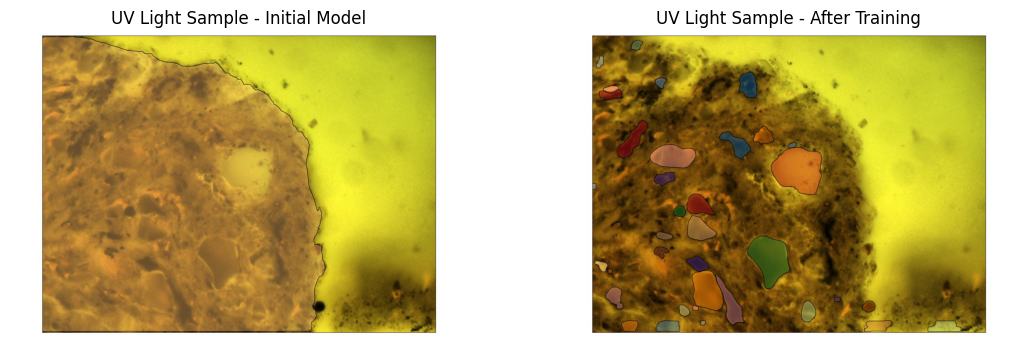

In [9]:
# figure size in inches optional
rcParams['figure.figsize'] = 13 ,10

# read images
img_A = mpimg.imread('images/example3.jpg')
img_B = mpimg.imread('images/example3_enhanced.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].title.set_text('UV Light Sample - Initial Model')
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].title.set_text('UV Light Sample - After Training')
ax[1].imshow(img_B)
ax[1].axis('off')
# plt.savefig('example3.png')
plt.show()

### Example 4 - Model Performance Before and After Training

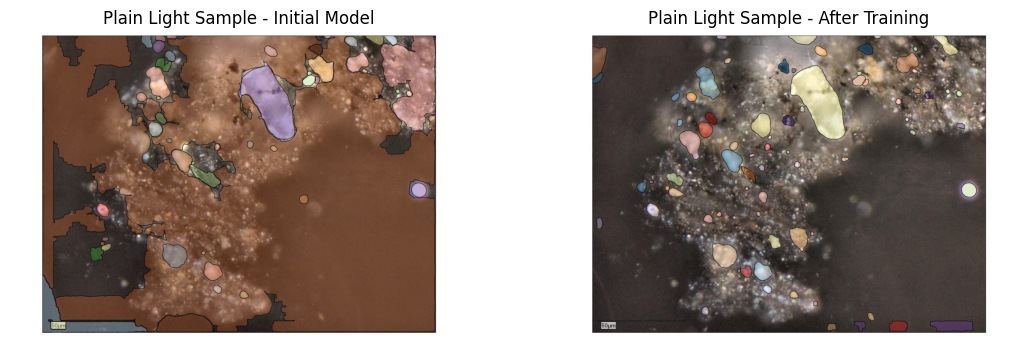

In [10]:
# figure size in inches optional
rcParams['figure.figsize'] = 13 ,10

# read images
img_A = mpimg.imread('images/example4.jpg')
img_B = mpimg.imread('images/example4_enhanced.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].title.set_text('Plain Light Sample - Initial Model')
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].title.set_text('Plain Light Sample - After Training')
ax[1].imshow(img_B)
ax[1].axis('off')
# plt.savefig('example4.png')
plt.show()

## Code

### Download model checkpoint (only run once)

In [7]:
import urllib.request
urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth', 'sam_vit_h_4b8939.pth')

('sam_vit_h_4b8939.pth', <http.client.HTTPMessage at 0x1dc916b1450>)

### Segment All Images

* The code below will process all of the images in the input folder and generate mask files. The mask files will be labeled in the format of *imagename_mask.npy* and output as numpy arrays.
* Input images should be placed in a folder named **images/ara-test/**
* output mask files will be saved in a folder named **output/**.

In [15]:
%%time

# import packages
import os
import cv2
import numpy as np
from skimage import exposure
from glob import glob
import torch
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import load_img
from skimage import measure
from skimage.measure import regionprops, regionprops_table
import matplotlib.pyplot as plt
from importlib import reload
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from tqdm import trange
import segmenteverygrain as seg


# Define project directories
image_dir = 'images/ara-test/subset'
dirname = 'output/'

# Optionally output images
enhanced_image_write = True
mask_image_write = True

# Load model and weights
model = seg.Unet()
model.compile(optimizer=Adam(), loss=seg.weighted_crossentropy, metrics=["accuracy"])
model.load_weights('./checkpoints/seg_model_20231009')

sam = sam_model_registry["default"](checkpoint="sam_vit_h_4b8939.pth")


# Run on CUDA if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
sam.to(device=device)
print(f"Processing with {device.upper()}")


# adaptive equalization function
def perform_adaptive_equalization(img_path, image_name, clip_lim=0.01):
    img = cv2.imread(img_path)
    img_adapteq = (255*exposure.equalize_adapthist(img, clip_limit=clip_lim)).astype(int)
    if enhanced_image_write: cv2.imwrite(dirname + image_name + '_enhanced.png', img_adapteq)
    return(img_adapteq)


# Segmentation function
def segment_grains(image, dirname, image_name):
    big_im_pred = seg.predict_big_image(image, model, I=256)

    # save mask as numy array
    np.save(os.path.join(dirname, f"{image_name}_mask.npy"), big_im_pred)
    if mask_image_write: cv2.imwrite(dirname + image_name + '_mask.png', big_im_pred)


# Segment images
image_paths = glob(os.path.join(image_dir, '*.JPG'))
for image_path in image_paths:
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    enhanced_image = perform_adaptive_equalization(image_path, image_name, clip_lim=0.01)
    segment_grains(enhanced_image, dirname, image_name)

Processing with CPU


100%|██████████| 6/6 [00:05<00:00,  1.10it/s]


CPU times: total: 34.2 s
Wall time: 1min 16s
